In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates[0:5]:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bethel us
nevyansk ru
hasaki jp
saldanha za
longview us


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | nevyansk
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | longview
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | jaque
Processing Record 19 of Set 1 | sola
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | lebu
Processing Record 24 of Set 1 | hilo
Processing Record 25 of Set 1 | vila franca do

Processing Record 39 of Set 4 | santa maria
Processing Record 40 of Set 4 | chernyshevskiy
Processing Record 41 of Set 4 | minden
Processing Record 42 of Set 4 | arlit
Processing Record 43 of Set 4 | zhezkazgan
Processing Record 44 of Set 4 | wawa
Processing Record 45 of Set 4 | muros
Processing Record 46 of Set 4 | pekalongan
Processing Record 47 of Set 4 | dikson
Processing Record 48 of Set 4 | shenjiamen
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | jardim
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | srandakan
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | hinton
Processing Record 6 of Set 5 | garden city
Processing Record 7 of Set 5 | college station
Processing Record 8 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 5 | natal
Processing Record 10 of Set 5 | mahebourg
Processing Record 11 of Set 5 | kahului
P

Processing Record 31 of Set 8 | ponta delgada
Processing Record 32 of Set 8 | sanski most
Processing Record 33 of Set 8 | ayios kirikos
City not found. Skipping...
Processing Record 34 of Set 8 | krasnoyarsk-45
City not found. Skipping...
Processing Record 35 of Set 8 | robertsport
Processing Record 36 of Set 8 | adamovka
Processing Record 37 of Set 8 | ust-kuyga
Processing Record 38 of Set 8 | road town
Processing Record 39 of Set 8 | oranjestad
Processing Record 40 of Set 8 | sturgeon falls
Processing Record 41 of Set 8 | magway
Processing Record 42 of Set 8 | sao jose da coroa grande
Processing Record 43 of Set 8 | maksi
Processing Record 44 of Set 8 | bud
Processing Record 45 of Set 8 | grand gaube
Processing Record 46 of Set 8 | nauta
Processing Record 47 of Set 8 | saskylakh
Processing Record 48 of Set 8 | sao joao da barra
Processing Record 49 of Set 8 | tezu
Processing Record 50 of Set 8 | nome
Processing Record 1 of Set 9 | half moon bay
Processing Record 2 of Set 9 | petropav

Processing Record 14 of Set 12 | macau
Processing Record 15 of Set 12 | pangoa
Processing Record 16 of Set 12 | misratah
Processing Record 17 of Set 12 | burica
City not found. Skipping...
Processing Record 18 of Set 12 | oktyabrskoye
Processing Record 19 of Set 12 | bubaque
Processing Record 20 of Set 12 | jan kempdorp
Processing Record 21 of Set 12 | tarana
Processing Record 22 of Set 12 | velingara
Processing Record 23 of Set 12 | katsuura
Processing Record 24 of Set 12 | brufut
Processing Record 25 of Set 12 | whittlesea
Processing Record 26 of Set 12 | ikwiriri
Processing Record 27 of Set 12 | baia de aries
Processing Record 28 of Set 12 | fraga
Processing Record 29 of Set 12 | shizunai
Processing Record 30 of Set 12 | lopukhiv
Processing Record 31 of Set 12 | phan rang
City not found. Skipping...
Processing Record 32 of Set 12 | port lincoln
Processing Record 33 of Set 12 | hay river
Processing Record 34 of Set 12 | bairiki
Processing Record 35 of Set 12 | mago
Processing Record 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,76.19,85,67,1.01,US,2021-09-17 20:06:52
1,Nevyansk,57.4953,60.2112,36.43,98,100,2.33,RU,2021-09-17 20:08:18
2,Hasaki,35.7333,140.8333,75.60,73,100,24.38,JP,2021-09-17 20:07:59
3,Saldanha,-33.0117,17.9442,59.27,60,0,15.95,ZA,2021-09-17 20:07:11
4,Longview,32.5007,-94.7405,88.99,63,90,5.37,US,2021-09-17 20:08:19
5,Georgetown,5.4112,100.3354,78.89,87,20,0.00,MY,2021-09-17 20:04:30
6,Mataura,-46.1927,168.8643,35.47,82,17,3.04,NZ,2021-09-17 20:07:05
7,Cape Town,-33.9258,18.4232,57.11,75,0,5.01,ZA,2021-09-17 20:07:02
8,Pevek,69.7008,170.3133,32.59,100,100,2.68,RU,2021-09-17 20:07:21
9,Rikitea,-23.1203,-134.9692,70.52,74,72,8.28,PF,2021-09-17 20:07:08


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1631909428.300491

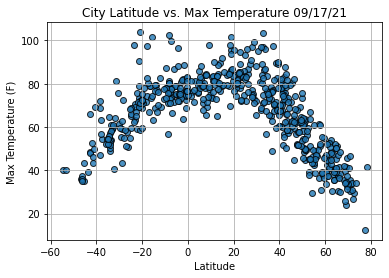

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

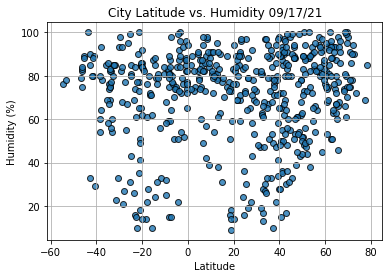

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

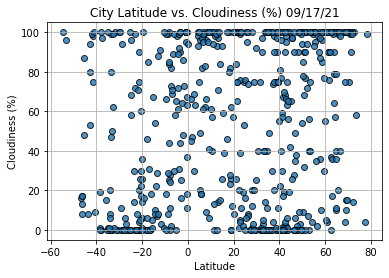

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

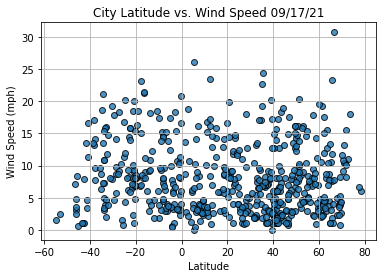

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()